In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Clean_Dataset.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [7]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [3]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [6]:
df["class"].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

Preprocessing

In [10]:
df = df.drop("Unnamed: 0", axis=1)
df = df.drop("flight", axis=1)

df["class"] = df["class"].apply(lambda x: 1 if x == "Business" else 0)

In [9]:
df.stops = pd.factorize(df.stops)[0]


In [14]:
df = df.join(pd.get_dummies(df.airline, prefix="airline")).drop("airline", axis=1)

In [16]:
df = df.join(pd.get_dummies(df.source_city, prefix="source")).drop("source_city", axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix="dest")).drop("destination_city", axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix="arrival")).drop("arrival_time", axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix="departure")).drop("departure_time", axis=1)


In [17]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


In [18]:
df = df.astype(int)
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


Training Regression Model

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X, y = df.drop("price", axis=1), df.price

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
reg = RandomForestRegressor(n_jobs=-1)

reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [55]:
reg.score(X_test, y_test)

0.9759436519532543

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

In [57]:


y_pred = reg.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))


R2: 0.9759436519532543
MAE: 1496.418927658071
MSE: 12404045.98625804
RMSE: 3521.9378169209685


In [58]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Prediction vs Actual')

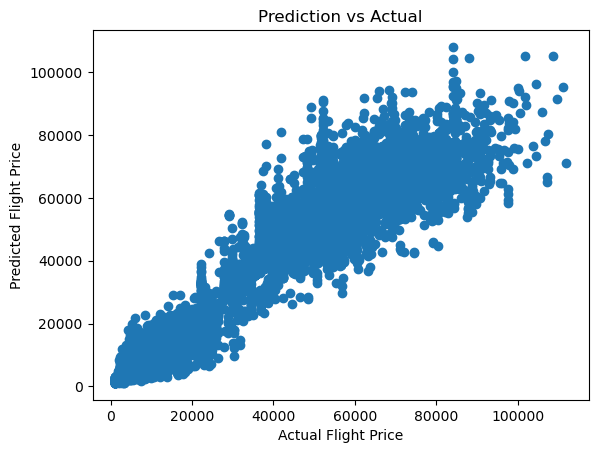

In [59]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Flight Price")
plt.ylabel("Predicted Flight Price")
plt.title("Prediction vs Actual")

In [60]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [61]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances

[('class', 0.8824520648164687),
 ('duration', 0.05072263710413745),
 ('days_left', 0.020927500923557767),
 ('airline_Air_India', 0.005204433923153695),
 ('airline_Vistara', 0.004987932186975656),
 ('source_Delhi', 0.0037865237482896494),
 ('dest_Delhi', 0.003510836268910985),
 ('source_Mumbai', 0.002292240632260742),
 ('dest_Mumbai', 0.002081613273244774),
 ('stops', 0.0017498994857792795),
 ('source_Kolkata', 0.001727247796852658),
 ('dest_Kolkata', 0.0017267560070161618),
 ('dest_Hyderabad', 0.0016022850634182376),
 ('arrival_Evening', 0.0015457841602553074),
 ('dest_Bangalore', 0.001375994728147961),
 ('arrival_Night', 0.0013354729145968944),
 ('source_Hyderabad', 0.0012950818104931518),
 ('source_Bangalore', 0.0012536438959001909),
 ('departure_Evening', 0.001236729643002251),
 ('arrival_Afternoon', 0.0010440362250357202),
 ('departure_Morning', 0.0010230613791158783),
 ('source_Chennai', 0.0009478317187607417),
 ('dest_Chennai', 0.0009430161631748795),
 ('departure_Early_Morning',

In [62]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

<BarContainer object of 10 artists>

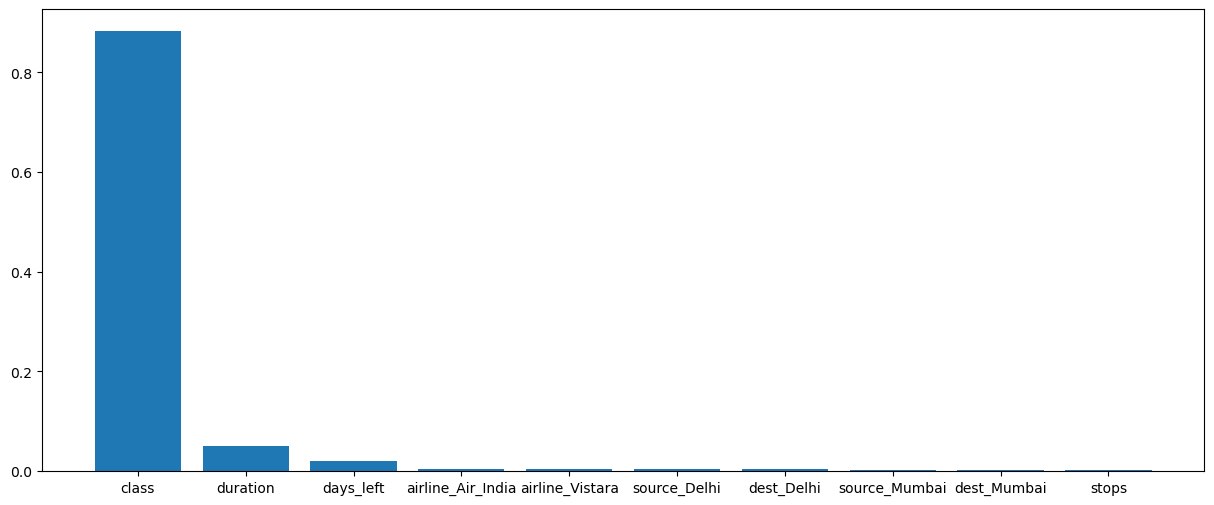

In [63]:
plt.figure(figsize=(15, 6))

plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

Exhasutive search for best params

In [67]:
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(n_jobs=-1)

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt"]
}

grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_


In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [74]:


param_dist = {
    "n_estimators": randint(100, 300),
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1, 5),
    "max_features": [1.0, "log2", "sqrt"]
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3, scoring="neg_mean_squared_error", verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)

best_reg = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [75]:
best_reg.score(X_test, y_test)

0.9793456584644958

In [78]:
y_pred = best_reg.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9793456584644958
MAE: 1437.4261196444795
MSE: 10649887.577467589
RMSE: 3263.4165497937265


Text(0.5, 1.0, 'Prediction vs Actual')

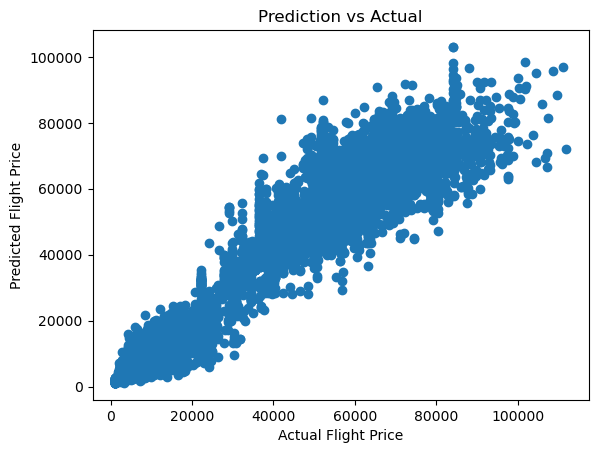

In [79]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Flight Price")
plt.ylabel("Predicted Flight Price")
plt.title("Prediction vs Actual")